In this notebook, we will explore the MIND dataset and derive insights that will inform our subsequent strategy.

In [ ]:
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import dcor

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_dir = '/content/drive/MyDrive/ML/Reinforcement Learning/Final project/MIND'

In [ ]:
behaviors_train_path = os.path.join(project_dir, 'MINDsmall_train/behaviors.tsv')
behaviors_train = pd.read_csv(behaviors_train_path, sep='\t', header=None, names=["impression_id", "user_id", "time", "history", "impressions"])

In [ ]:
news_train_path = os.path.join(project_dir, 'MINDsmall_train/news.tsv')
news_train = pd.read_csv(news_train_path, sep='\t', header=None, names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"])

In [ ]:
behaviors_train.head()

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [ ]:
news_train.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [ ]:
num_users = behaviors_train['user_id'].nunique()
num_articles = news_train['news_id'].nunique()
num_impressions = behaviors_train.shape[0]

print(f"Number of unique users: {num_users}")
print(f"Number of unique articles: {num_articles}")
print(f"Number of impressions: {num_impressions}")

Number of unique users: 50000
Number of unique articles: 51282
Number of impressions: 156965


In [ ]:
# Not all articles from the news data are used in the history set

unique_hist_articles = set()
behaviors_train['history'].dropna().apply(lambda x: unique_hist_articles.update(x.split()))

print(f"Total unique articles in train history: {len(unique_hist_articles)}")

Total unique articles in train history: 33195


In [ ]:
# Not all articles from the news data are used in the impressions set

unique_imp_articles = set()
behaviors_train['impressions'].dropna().apply(lambda x: unique_imp_articles.update(i.split('-')[0] for i in x.split(' ')))

print(f"Total unique articles in train impressions: {len(unique_imp_articles)}")

Total unique articles in train impressions: 20288


In [ ]:
print(f"Number of articles used both in histories and impressions: {len(unique_imp_articles.intersection(unique_hist_articles))}")

Number of articles used both in histories and impressions: 2201


In [ ]:
# All unique articles from both histories and impressions are in the news data

print(len(unique_hist_articles | unique_imp_articles) == num_articles)
print(len((unique_hist_articles | unique_imp_articles) - set(news_train['news_id'])))

True
0


In [ ]:
news_dev_path = os.path.join(project_dir, 'MINDsmall_dev/news.tsv')
news_dev = pd.read_csv(news_dev_path, sep='\t', header=None, names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"])

print(f"Number of unique articles in dev news dataset: {news_dev['news_id'].nunique()}")

Number of unique articles in dev news dataset: 42416


In [ ]:
# Some news articles appear both in train and test sets

len(set(news_dev['news_id']).intersection(news_train['news_id']))

28460

### Observation 1

Users have histories of varying lengths. Some users have none at all, while others are super-users with hundreds of items in their histories. Should we only consider N last items in the histories as the initial user's state? What's the minimum number of items in a user's history we should consider for our task?

Also, we will make sure to remove all nans later on.

In [ ]:
def count_history_length(history):
    if isinstance(history, str):
        return len(history.split())
    return 0

In [ ]:
behaviors_train['history_length'] = behaviors_train['history'].apply(count_history_length)

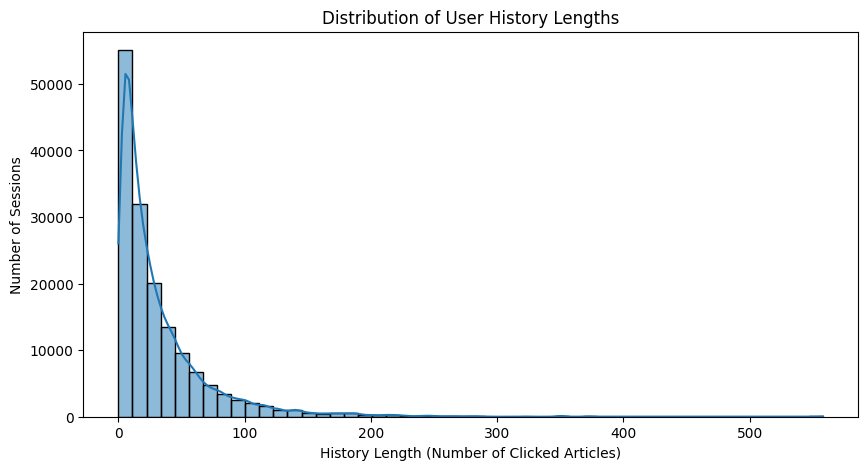

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(behaviors_train['history_length'], bins=50, kde=True)
plt.xlabel("History Length (Number of Clicked Articles)")
plt.ylabel("Number of Sessions")
plt.title("Distribution of User History Lengths")
plt.show()

In [ ]:
behaviors_train[behaviors_train['history_length'] == 0]['user_id'].value_counts()

,count
user_id,
U9935,19
U41595,19
U70786,16
U89839,16
U59042,15
...,...
U53964,1
U79170,1
U37195,1


In [ ]:
behaviors_train[behaviors_train['history_length'] == 1]['user_id'].value_counts()

,count
user_id,
U1776,14
U41223,13
U36552,12
U94054,10
U85095,10
...,...
U17768,1
U993,1
U16759,1


In [ ]:
behaviors_train[behaviors_train['history_length'] == 100]['user_id'].value_counts()

,count
user_id,
U43884,33
U51129,15
U49894,15
U79688,14
U21004,14
U52556,11
U8696,10
U53156,9
U81446,9


In [ ]:
print(f"Number of sessions with no history: {behaviors_train['history'].isna().sum()}")

Number of sessions with no history: 3238


### Observation 2

Some impressions present very long sequences but the majority of them are between 1 and 50 items long, with click rates mostly falling under 0.1 for longer sequences. The longer the sequences, the lower the click share rate is. There's a noticeable peak of 0.5 click share rate for those impressions that consist of two items. The plots reveal that the click rates are generally decreasing as the impression sequences are getting longer.  

Some sessions reveal duplicate impressions, meaning some users are not only recommended the same items but demonstrate the same click behavior as well.

The plots also show that as history length increases, impression length seems to decrease on average. This indicates that users with long browsing histories might be receiving fewer recommendations per session. Users with short histories get more diverse recommendations since the system has less personal data to work with. But the correlation between history length and impressions length is weak.

There are no nan values among impressions.

In [ ]:
def count_impressions_length(impression):
    if isinstance(impression, str):
        return len([i.split('-')[0] for i in impression.split(' ')])
    return 0

In [ ]:
behaviors_train['impressions_length'] = behaviors_train['impressions'].apply(count_impressions_length)

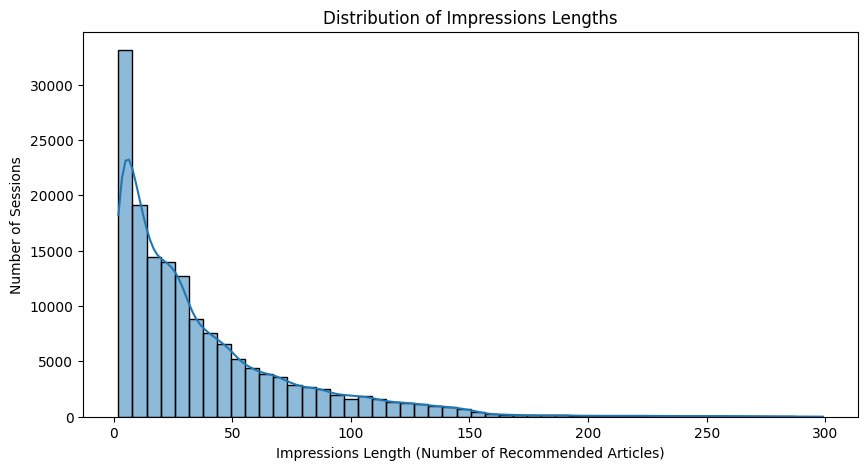

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(behaviors_train['impressions_length'], bins=50, kde=True)
plt.xlabel("Impressions Length (Number of Recommended Articles)")
plt.ylabel("Number of Sessions")
plt.title("Distribution of Impressions Lengths")
plt.show()

In [ ]:
# Some users are given the same impressions and demonstrate the same click behavior

impressions_duplicates = behaviors_train[behaviors_train.duplicated(['impressions'], keep=False)].sort_values('impressions').reset_index(drop=True)

print(f'Number of duplicated impressions: {len(impressions_duplicates)}')

Number of duplicated impressions: 15603


In [ ]:
impressions_duplicates.head()

,impression_id,user_id,time,history,impressions,history_length,impressions_length
0,137098,U57618,11/9/2019 6:46:35 PM,N47685 N32166 N30353,N1034-0 N47020-0 N65185-1,3,3
1,27816,U36626,11/9/2019 9:27:55 PM,N56207 N1351 N24966 N5568,N1034-0 N47020-0 N65185-1,4,3
2,88823,U21004,11/9/2019 6:47:40 PM,N64727 N45395 N34561 N39888 N3500 N39823 N5157...,N1034-0 N47020-0 N65185-1,100,3
3,104772,U60700,11/9/2019 7:02:02 PM,N38390 N48276 N45954 N52536 N26176 N6484 N2174...,N1034-0 N47020-0 N65185-1,42,3
4,37728,U1266,11/9/2019 6:37:34 PM,N3500 N60206 N6233 N19982 N61103 N31057 N49365...,N1034-0 N47020-0 N65185-1,27,3


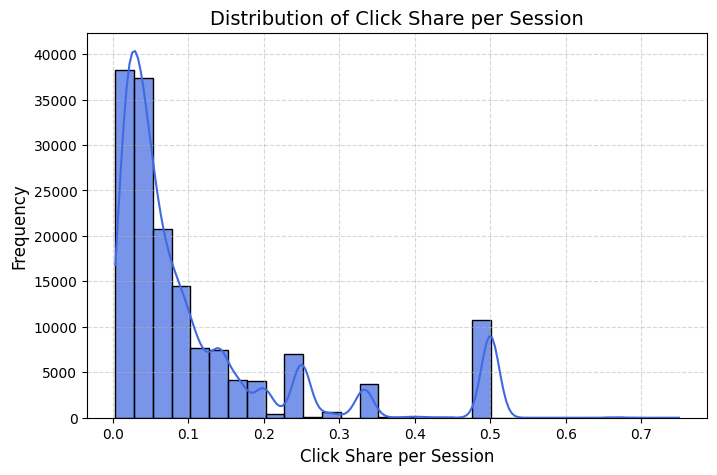

In [ ]:
# Calculate and plot users' click shares.

behaviors_train["click_share"] = behaviors_train["impressions"].apply(lambda x: np.mean([int(item.split("-")[1]) for item in x.split()]))

plt.figure(figsize=(8, 5))
sns.histplot(behaviors_train["click_share"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

plt.xlabel("Click Share per Session", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Click Share per Session", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

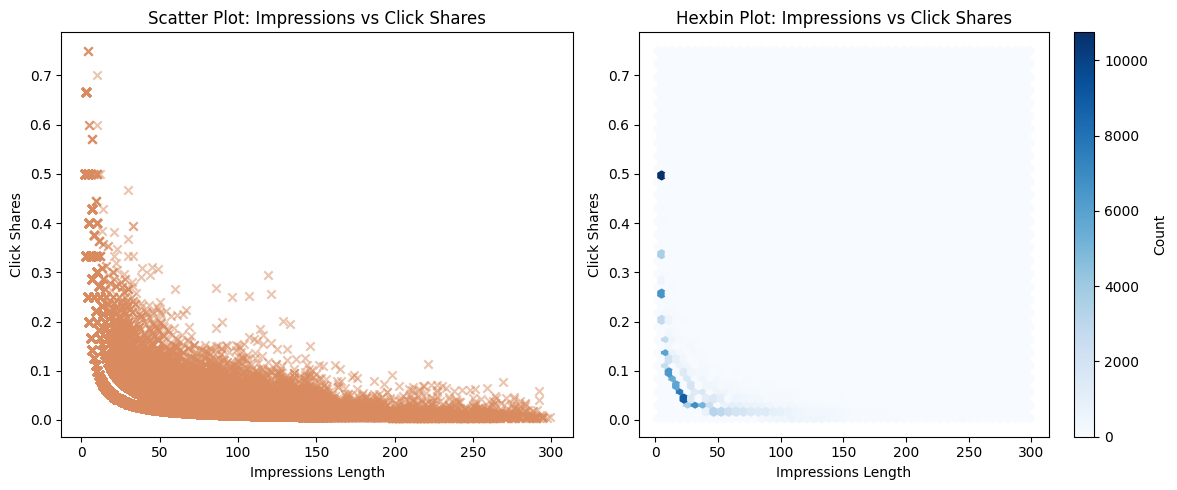

In [ ]:
# Plot the relationship between click shares and impressions lengths

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot
axes[0].scatter(behaviors_train['impressions_length'], behaviors_train['click_share'], color='#D98B5F', marker='x', alpha=0.5)
axes[0].set_title("Scatter Plot: Impressions vs Click Shares")
axes[0].set_xlabel("Impressions Length")
axes[0].set_ylabel("Click Shares")

# Hexbin plot
hb = axes[1].hexbin(behaviors_train['impressions_length'], behaviors_train['click_share'], gridsize=50, cmap='Blues', reduce_C_function=np.sum)
axes[1].set_title("Hexbin Plot: Impressions vs Click Shares")
axes[1].set_xlabel("Impressions Length")
axes[1].set_ylabel("Click Shares")

cbar = fig.colorbar(hb, ax=axes[1])
cbar.set_label("Count")

plt.tight_layout()
plt.show()

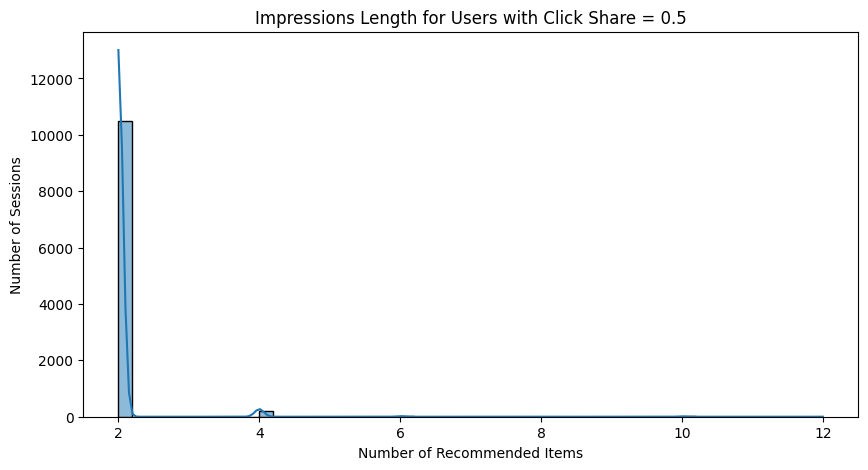

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(behaviors_train[behaviors_train['click_share'] == 0.5]['impressions_length'], bins=50, kde=True)
plt.xlabel("Number of Recommended Items")
plt.ylabel("Number of Sessions")
plt.title("Impressions Length for Users with Click Share = 0.5")
plt.show()

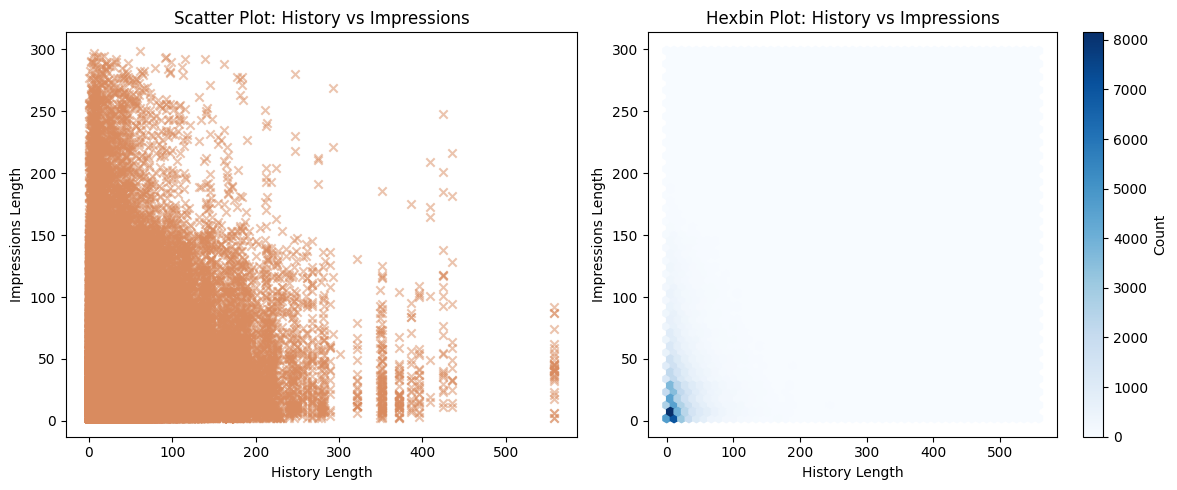

In [ ]:
# Plot the relationship between history lengths and impressions lengths

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot
axes[0].scatter(behaviors_train['history_length'], behaviors_train['impressions_length'], color='#D98B5F', marker='x', alpha=0.5)
axes[0].set_title("Scatter Plot: History vs Impressions")
axes[0].set_xlabel("History Length")
axes[0].set_ylabel("Impressions Length")

# Hexbin plot
hb = axes[1].hexbin(behaviors_train['history_length'], behaviors_train['impressions_length'], gridsize=50, cmap='Blues', reduce_C_function=np.sum)
axes[1].set_title("Hexbin Plot: History vs Impressions")
axes[1].set_xlabel("History Length")
axes[1].set_ylabel("Impressions Length")

cbar = fig.colorbar(hb, ax=axes[1])
cbar.set_label("Count")

plt.tight_layout()
plt.show()

In [ ]:
dist_corr = dcor.distance_correlation(behaviors_train['history_length'].astype(float),
                                      behaviors_train['impressions_length'].astype(float))
print(f'Distance Correlation: {dist_corr:.4f}')

Distance Correlation: 0.0875


In [ ]:
print(f"Number of sessions with no impressions: {behaviors_train['impressions'].isna().sum()}")

Number of sessions with no impressions: 0


### Observation 3

Some users have more than one session. But in this case the histories for each user are absolutely identical, i.e. there's the same number of unique (user_id, history) combinations as the number of unique user_ids. If the user has multiple sessions, we will combine the impressions from these sessions into a single impression.

However, some recommended items may appear more than once in different sessions' impressions for the same user. We should keep them because even if the user hasn't clicked some item id, he may do so later after seeing other recommendations.

**Also, occasionally some items appear both in histories and impressions.** The item duplicates in the impressions may not have clicks as they have already appeared in the histories. Should we consider removing all such item ids from impressions and recommend only items that have not appeared in the histories yet?

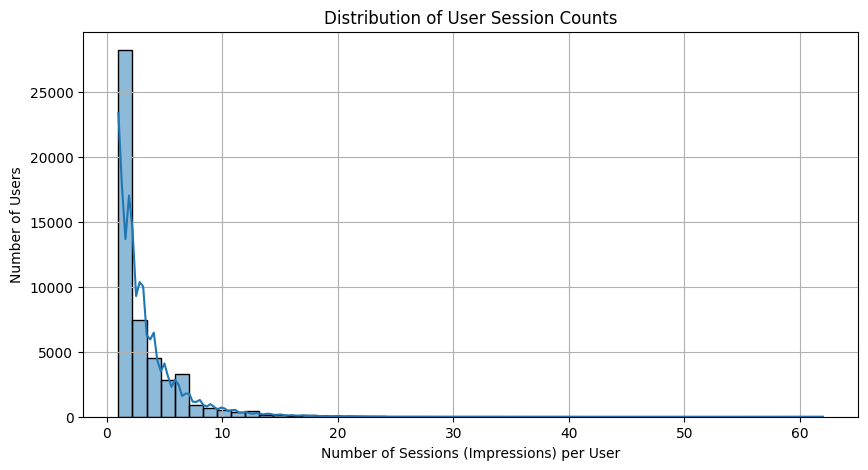

In [ ]:
user_session_counts = behaviors_train['user_id'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(user_session_counts, bins=50, log_scale=False, kde=True)
plt.xlabel("Number of Sessions (Impressions) per User")
plt.ylabel("Number of Users")
plt.title("Distribution of User Session Counts")
plt.grid()
plt.show()

In [ ]:
# check that there's the same number of unique (user_id, history) combinations as the unique number of user_ids

len(behaviors_train.drop_duplicates(['user_id', 'history'])) == behaviors_train['user_id'].nunique()

True

In [ ]:
# pick users with multiple sessions to have a closer look

filtered_users = user_session_counts[user_session_counts > 1].index

In [ ]:
filtered_users

Index(['U32146', 'U15740', 'U20833', 'U51286', 'U44201', 'U30304', 'U79449',
       'U57047', 'U47521', 'U56120',
       ...
       'U62672', 'U3055', 'U65175', 'U39649', 'U744', 'U14600', 'U82936',
       'U6934', 'U49021', 'U49945'],
      dtype='object', name='user_id', length=33617)

In [ ]:
# % of items with the same responses appearing more than once in different sessions for users with multiple sessions

user_percentages_non_unique = []

for user_id in filtered_users:

    sample_user = behaviors_train[behaviors_train['user_id'] == user_id]
    all_sample_recs = sum((row.split() for row in sample_user['impressions']), [])
    rec_counts = Counter(all_sample_recs)

    if len(rec_counts) > 0:
        perc_non_unique = 100 * round(sum(count > 1 for count in rec_counts.values()) / len(all_sample_recs), 2)
        user_percentages_non_unique.append(perc_non_unique)

# Compute the average percentage across all such users
print(f'{np.mean(user_percentages_non_unique):.2f}%')

7.78%


In [ ]:
# pick a single user to have a closer look

sample_user_id = behaviors_train[(behaviors_train['user_id'].isin(filtered_users)) & (behaviors_train['history_length'] == 5)].iloc[0, 1]
sample_user = behaviors_train[behaviors_train['user_id'] == sample_user_id]

In [ ]:
sample_user['time'] = pd.to_datetime(sample_user['time'], format="%m/%d/%Y %I:%M:%S %p")

<ipython-input-77-c98b8db14d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_user['time'] = pd.to_datetime(sample_user['time'], format="%m/%d/%Y %I:%M:%S %p")


In [ ]:
sample_user = sample_user.sort_values('time').copy()

In [ ]:
sample_user

,impression_id,user_id,time,history,impressions,history_length,impressions_length,click_share
3158,3159,U38627,2019-11-11 09:28:46,N21136 N306 N26026 N2309 N36530,N59981-1 N35729-0 N63550-0 N55689-0 N52622-0 N...,5,7,0.142857
23397,23398,U38627,2019-11-11 10:51:05,N21136 N306 N26026 N2309 N36530,N36621-0 N32387-0 N57005-0 N31763-0 N54482-0 N...,5,99,0.010101
25544,25545,U38627,2019-11-12 06:09:25,N21136 N306 N26026 N2309 N36530,N24207-0 N14184-0 N7319-0 N41020-0 N49180-0 N4...,5,12,0.083333
32959,32960,U38627,2019-11-12 10:49:17,N21136 N306 N26026 N2309 N36530,N63970-1 N58363-0 N27560-0 N40839-0,5,4,0.250000
18,19,U38627,2019-11-13 11:18:10,N21136 N306 N26026 N2309 N36530,N4642-0 N26025-0 N4913-0 N287-1 N39010-0 N5104...,5,11,0.181818
769,770,U38627,2019-11-14 04:48:10,N21136 N306 N26026 N2309 N36530,N6816-0 N4404-0 N40559-0 N42457-0 N30089-0 N80...,5,56,0.017857
128811,128812,U38627,2019-11-14 10:15:59,N21136 N306 N26026 N2309 N36530,N24109-0 N35815-0 N33576-0 N10552-0 N11817-0 N...,5,28,0.035714


In [ ]:
# history col

sample_user.iloc[0, 3]

'N21136 N306 N26026 N2309 N36530'

In [ ]:
# impressions col

sample_user.iloc[0, 4]

'N59981-1 N35729-0 N63550-0 N55689-0 N52622-0 N7809-0 N21707-0'

In [ ]:
# print out different sessions' histories

for i in range(len(sample_user)):
  print(sample_user.iloc[i, 3])

N21136 N306 N26026 N2309 N36530
N21136 N306 N26026 N2309 N36530
N21136 N306 N26026 N2309 N36530
N21136 N306 N26026 N2309 N36530
N21136 N306 N26026 N2309 N36530
N21136 N306 N26026 N2309 N36530
N21136 N306 N26026 N2309 N36530


In [ ]:
# each session contains impressions of different lengths

all_sample_recs = []

for i in range(len(sample_user)):
  l = sample_user.iloc[i, 4].split()
  print(len(l))
  all_sample_recs.extend(l)

print(f'Total len of all impressions: {len(all_sample_recs)}')

7
99
12
4
11
56
28
Total len of all impressions: 217


In [ ]:
# occasionally some items appear both in histories and impressions

common_hist_imp_indices = []

behavior_train_nans_removed = behaviors_train.dropna(axis=0).reset_index(drop=True)

for i in range(len(behavior_train_nans_removed)):

  session_hist = behavior_train_nans_removed.iloc[i, 3].split(' ')
  session_impressions = [imp.split('-')[0] for imp in behavior_train_nans_removed.iloc[i, 4].split(' ')]

  if set(session_hist).intersection(set(session_impressions)):
    common_hist_imp_indices.append(i)

In [ ]:
# Total number of such users

print(behavior_train_nans_removed.iloc[common_hist_imp_indices]['user_id'].nunique())

5629


In [ ]:
# pick a single example

behavior_train_nans_removed.iloc[common_hist_imp_indices[:10]].iloc[8, 3]

'N55829 N16344 N459 N53053 N20681 N17157 N29597 N53393 N11917 N25050 N27448 N65201 N4483 N55435 N29249 N26693 N34694 N12096 N22161 N8667 N2368 N53196 N57318 N39533 N22591 N61519 N15364 N29778 N22562 N39208 N46242 N5261 N49290 N1127 N61166 N25453 N46655 N23958 N37394 N55897 N16344 N38962 N46811 N39985 N3894'

In [ ]:
behavior_train_nans_removed.iloc[common_hist_imp_indices[:10]].iloc[8, 4]

'N43502-0 N47229-0 N7128-0 N64542-0 N21882-0 N33964-0 N54482-0 N43338-0 N15855-0 N2869-0 N54988-0 N37115-0 N18708-0 N46134-0 N15830-0 N23414-1 N55204-0 N3894-0 N24176-0 N13930-0 N53214-0 N61623-0 N31370-0 N60872-0 N55940-0 N16342-0 N55689-0 N64397-0 N53054-0 N34724-0 N12523-0 N58499-0'

In [ ]:
sample_hist = set(behavior_train_nans_removed.iloc[common_hist_imp_indices[:10]].iloc[8, 3].split(' '))
sample_imp = set([imp.split('-')[0] for imp in behavior_train_nans_removed.iloc[common_hist_imp_indices[:10]].iloc[8, 4].split(' ')])

print(sample_hist.intersection(sample_imp))

{'N3894'}
